## Detection accuracy on single sound clips

In [1]:
import os
import numpy as np
import librosa

In [2]:
from math import floor
from lib_augment import load_and_normalize
from lib_feature import feature_whistleness

%matplotlib inline
import matplotlib.pyplot as plt


In [3]:
deploy_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #

In [4]:
# loading the trained model
from tensorflow.keras.models import load_model
import tensorflow_addons.layers.spatial_pyramid_pooling as spp


model_whistleness_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_whistleness/2021-02-02_200514_resnet18_expt_alldata_run0_f1_lr_0.001/epoch_163_valloss_0.2434_valacc_0.9472.hdf5'
model_whistleness = load_model(model_whistleness_path)
model_whistleness.summary()

# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210303_233728/STAR2000/epoch_53_valloss_0.9505_valacc_0.7552.hdf5'
# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210305_105231/STAR2000/epoch_56_valloss_0.1945_valacc_0.7305.hdf5'
model_species_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210310_095616/STAR2000/epoch_48_valloss_0.1938_valacc_0.7403.hdf5'

model_species = load_model(model_species_path)
model_species.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 128, 1) 0                                            
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 100, 128, 16) 144         input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 100, 128, 16) 64          conv0[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, 100, 128, 16) 0           bn_conv1[0][0]                   
______________________________________________________________________________________________

In [5]:
def enounter_features(encounter_folder):
    sound_files = os.listdir(encounter_folder)

    spec_feas_curr = []
    for ff in sound_files:
    # for ff in sound_files[:2]:
    # for ff in [sound_files[1]]:
        print(ff)
        samples, _ = librosa.load(os.path.join(encounter_folder, ff), sr=fs)
        print('Sound length: '+str(samples.shape[0]/fs))
        if samples.ndim >= 2:
            samples = samples[:, 0]

        for ss in range(floor((samples.shape[0]-win_size)/step_size)+1):
            samples_curr = samples[ss*step_size:ss*step_size+win_size]
            samples_curr = samples_curr - samples_curr.mean()

            spectro = librosa.feature.melspectrogram(samples_curr,sr=fs, hop_length=960, power=1.0)
            # spectro = librosa.feature.melspectrogram(samples_curr,sr=fs)
            spec_feas_curr.append(feature_whistleness(spectro))
    spec_feas = np.stack(spec_feas_curr)
    spec_feas = np.expand_dims(spec_feas[:, :100, :], axis=3)
    
    # score = model_species.predict(spec_feas)
    
    return spec_feas

In [6]:
species_to_code = {'bottlenose': 'BD', 'longbeaked_common': 'CD', 'shortbeaked_common': 'CD', 'common': 'CD',
                   'striped': 'STR', 'spotted': 'SPT', 'spinner': 'SPIN', 'pilot': 'PLT', 'roughtoothed': 'RT',
                   'false_killer': 'FKW'}
species_list = list(species_dict.keys())
species_id = list(species_dict.values())

In [7]:
np.set_printoptions(linewidth=200, precision=2, suppress=True)

In [8]:
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #

step_sec = 0.5
# step_size = int(1.0*fs)
step_size = int(step_sec*fs)
win_size = int(2.0*fs)

## Star2000

In [9]:
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'

In [10]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [11]:
encounter_test

['bottlenose s352',
 'bottlenose s46',
 'longbeaked_common s329',
 'longbeaked_common s338',
 'pilot s288',
 'roughtoothed s417',
 'shortbeaked_common s282',
 'shortbeaked_common s302',
 'shortbeaked_common s303',
 'shortbeaked_common s313',
 'shortbeaked_common s346',
 'shortbeaked_common s368',
 'shortbeaked_common s374',
 'shortbeaked_common s375',
 'shortbeaked_common s376',
 'shortbeaked_common s377',
 'shortbeaked_common s378',
 'shortbeaked_common s48',
 'shortbeaked_common s515',
 'shortbeaked_common s561',
 'spinner s111',
 'spinner s447',
 'spinner s459',
 'spinner s522',
 'spinner s63',
 'spotted s125',
 'spotted s394',
 'spotted s42',
 'spotted s498',
 'striped s17',
 'striped s274',
 'striped s380',
 'striped s39',
 'striped s395',
 'striped s396',
 'striped s398',
 'striped s399',
 'striped s445',
 'striped s455',
 'striped s472',
 'striped s483',
 'striped s6',
 'striped s88',
 'striped s92']

In [15]:
### run on a encounter encounter[0]

# avg_score_list = []
class_pred = []
class_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in encounter_test[0:1]:
# for ee in ['shortbeaked_common s628']:
    print('\n'+ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas = enounter_features(encounter_folder)
    
    whistleness = model_whistleness.predict(spec_feas)
    
    # calcualte scores for whistleness frames
    whistleness_ind = np.where(whistleness[:, 1]>0.9)[0]
    scores = model_species.predict(spec_feas[whistleness_ind,:, :, :])
    
    scores_large_ind = np.where(scores.max(axis=1) >= 0.5)[0]
    scores_large = scores[scores_large_ind, :]
    
    class_pred_curr = np.argmax(scores_large, axis=1)
    print(class_pred_curr)
    class_pred.append(class_pred_curr)
    
    class_truth_curr_one = species_dict[species_to_code[ee.split(" ")[0]]]
    class_truth_curr = [class_truth_curr_one]*np.ones(class_pred_curr.shape[0]).astype(int)
    print(class_truth_curr)
    class_truth.append(class_truth_curr)
    
    if False:
        # ave score
        # label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.70))))  # .mean(axis=0)
        whistle_species = (np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*(scores>0.70)  # .mean(axis=0)
        label_pred = (scores**2.0)*whistle_species

        num_large_score =(label_pred>0.0).sum(axis=0)
        total_score = np.sqrt(label_pred.sum(axis=0))
        avg_score = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score[cc] = total_score[cc] / num_large_score[cc]
        avg_score_list.append(avg_score)
        print('average score:')
        print(avg_score)

        # whistle counts
        count_large = whistle_species*(scores>0.70).sum(axis=0)
        print('count_large:')
        print(count_large)

        # max score
        max_score =label_pred.max(axis=0)
        print('maximum score:')
        print(max_score)
    
# avg_score_all = np.stack(avg_score_list)


bottlenose s352
Acst0953.b02.wav
Sound length: 69.75502083333333
Acst0954.b02.wav
Sound length: 43.41775
Acst0956.b02.wav
Sound length: 58.57295833333333
Acst0957.b02.wav
Sound length: 55.05039583333333
Acst0955.b02.wav
Sound length: 55.541916666666665
[6 6 6 1 3 3 2 2 2 0 3 6 6 6 6 6 6 6 6 1 7 1 1 1 6 6 6 3 6 6 0 5 5 5 6 4 4 6 3 3 2 0 0 0 5 5 5 3 6 6 3 3 3 3 3 0 4 5 3 3 1 1 7 7 7 7 7 0 0 3 6 6 7 0 0 3 7 7 0 5 7 1 1 1 1 1 1 1 3 1 3 3 6 6 6 6 0 0 0
 6 6 6 3 6 6 6 1 6 4 6 6 6 6 5 6 6 4 6 3 3 1 1 1 1 1 0 0 3 0 3 3 3 3 4 3 3 3 3 3 3 2 2 2 2 2 2 3 3 3 3 0 3 6 6 5 3 2 2 2 5 2 2 1 1 1 1 2 2 2 3 2 2 2 2 2 2 3 1 1 1 1 2 5 5 3 1 1 1 1 1 7 3 3 3 3 6 6 3
 3 5 6 5 5 6 3 6 6 6 6 6 6 6 7 1 1 1 1 3 3 6 6 6 6 5 6 5 6 6 6 6 6 6 1 1 1 6 6 6 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [16]:
class_pred_tot = np.concatenate(class_pred)
class_truth_tot = np.concatenate(class_truth)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(class_truth_tot, class_pred_tot, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[  67   41   35  126    7   25   68   13]
 [1261 5303 1757 2020   98  832  603   47]
 [ 505  345  883 1145   17  262   96   36]
 [  87  597   90 1835    9   97   55    9]
 [ 423   90  125  672  122   22    7    6]
 [   0    0    0    0    2   80    1   14]
 [  41    3   23   14    1   20   95   17]
 [   0    0    0    0    0    0    0    0]]

[[0.18 0.11 0.09 0.33 0.02 0.07 0.18 0.03]
 [0.11 0.44 0.15 0.17 0.01 0.07 0.05 0.  ]
 [0.15 0.1  0.27 0.35 0.01 0.08 0.03 0.01]
 [0.03 0.21 0.03 0.66 0.   0.03 0.02 0.  ]
 [0.29 0.06 0.09 0.46 0.08 0.01 0.   0.  ]
 [0.   0.   0.   0.   0.02 0.82 0.01 0.14]
 [0.19 0.01 0.11 0.07 0.   0.09 0.44 0.08]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [18]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

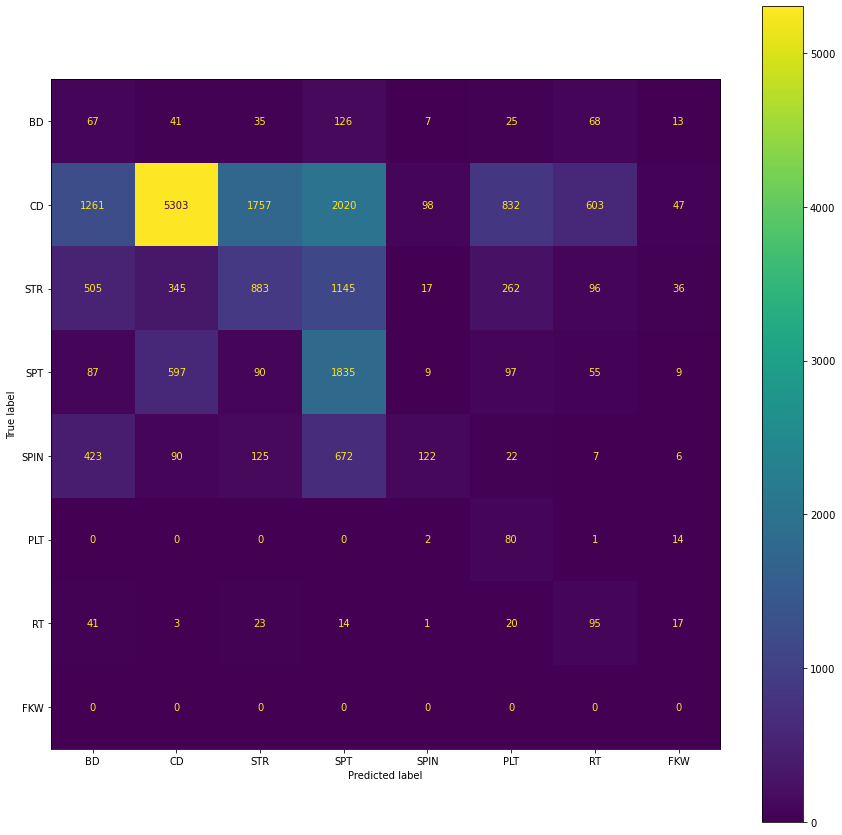

In [19]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


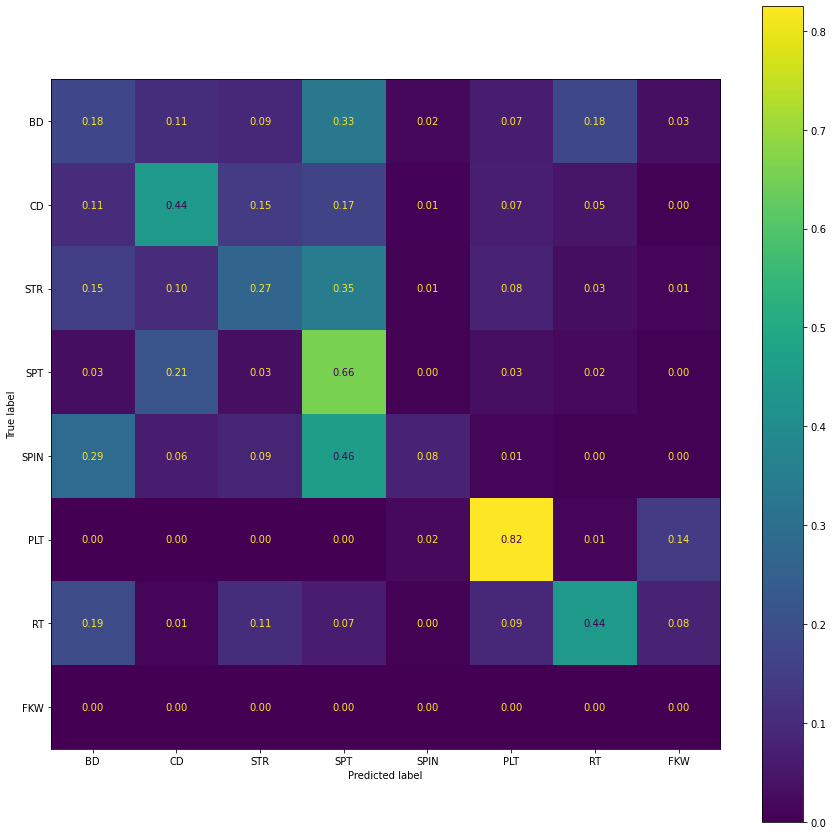

In [20]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## Star2003

In [21]:
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'

In [22]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [23]:
encounter_test

['bottlenose s494',
 'bottlenose s516',
 'bottlenose s586',
 'false_killer s776',
 'longbeaked_common s482',
 'shortbeaked_common s489',
 'shortbeaked_common s627',
 'shortbeaked_common s628',
 'shortbeaked_common s631',
 'shortbeaked_common s640',
 'shortbeaked_common s792',
 'spinner s757',
 'spotted s508',
 'spotted s511',
 'striped s652',
 'striped s784',
 'striped s788']

In [24]:
### run on a encounter encounter[0]

# avg_score_list = []
class_pred = []
class_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in encounter_test[0:1]:
# for ee in ['shortbeaked_common s628']:
    print('\n'+ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas = enounter_features(encounter_folder)
    
    whistleness = model_whistleness.predict(spec_feas)
    
    # calcualte scores for whistleness frames
    whistleness_ind = np.where(whistleness[:, 1]>0.9)[0]
    scores = model_species.predict(spec_feas[whistleness_ind,:, :, :])
    
    scores_large_ind = np.where(scores.max(axis=1) >= 0.5)[0]
    scores_large = scores[scores_large_ind, :]
    
    class_pred_curr = np.argmax(scores_large, axis=1)
    print(class_pred_curr)
    class_pred.append(class_pred_curr)
    
    class_truth_curr_one = species_dict[species_to_code[ee.split(" ")[0]]]
    class_truth_curr = [class_truth_curr_one]*np.ones(class_pred_curr.shape[0]).astype(int)
    print(class_truth_curr)
    class_truth.append(class_truth_curr)
    
    if False:
        # ave score
        # label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.70))))  # .mean(axis=0)
        whistle_species = (np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*(scores>0.70)  # .mean(axis=0)
        label_pred = (scores**2.0)*whistle_species

        num_large_score =(label_pred>0.0).sum(axis=0)
        total_score = np.sqrt(label_pred.sum(axis=0))
        avg_score = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score[cc] = total_score[cc] / num_large_score[cc]
        avg_score_list.append(avg_score)
        print('average score:')
        print(avg_score)

        # whistle counts
        count_large = whistle_species*(scores>0.70).sum(axis=0)
        print('count_large:')
        print(count_large)

        # max score
        max_score =label_pred.max(axis=0)
        print('maximum score:')
        print(max_score)
    
# avg_score_all = np.stack(avg_score_list)


bottlenose s494
STAR031106-113842.wav
Sound length: 36.05
[3 2 1 5 5 3 0 0]
[0 0 0 0 0 0 0 0]

bottlenose s516
STAR031109-114858.wav
Sound length: 16.7
STAR031109-114921.wav
Sound length: 38.77
STAR031109-115201.wav
Sound length: 178.46
STAR031109-114625.wav
Sound length: 111.3
STAR031109-115149.wav
Sound length: 5.6
STAR031109-115500.wav
Sound length: 67.04
STAR031109-115000.wav
Sound length: 11.23
STAR031109-114829.wav
Sound length: 4.7
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 4 0 0 0 3 3 0 2 0 0 1 2 2 1 1 0 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 3 0 0 3 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 2 2 0 2 3 3 2 2 0 0 0 3 3 3 3 3 0 0 0 0 0 0 0 4 4 0 0 0 3 2 2 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 2 0 3 3 3 0 0 0 0 2 0 3 0 0 0 2 2 0 2 2 1 1 1 2 2 2 2 3 2 2 3 3 2 0 0 0 0
 0 0 0 0 0 3 3 0 0 0 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [25]:
class_pred_tot = np.concatenate(class_pred)
class_truth_tot = np.concatenate(class_truth)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(class_truth_tot, class_pred_tot, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[ 478   54   45   88    9    4   27    5]
 [  12 2403   58   80    3    3   17   12]
 [   2  106   36   14    0    0    1    7]
 [   4   59   39 1342    0    3   12    0]
 [   1   13   19   31   70    0    1    6]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0   13    0    8    1   15   40  939]]

[[0.67 0.08 0.06 0.12 0.01 0.01 0.04 0.01]
 [0.   0.93 0.02 0.03 0.   0.   0.01 0.  ]
 [0.01 0.64 0.22 0.08 0.   0.   0.01 0.04]
 [0.   0.04 0.03 0.92 0.   0.   0.01 0.  ]
 [0.01 0.09 0.13 0.22 0.5  0.   0.01 0.04]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.01 0.   0.01 0.   0.01 0.04 0.92]]


In [27]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

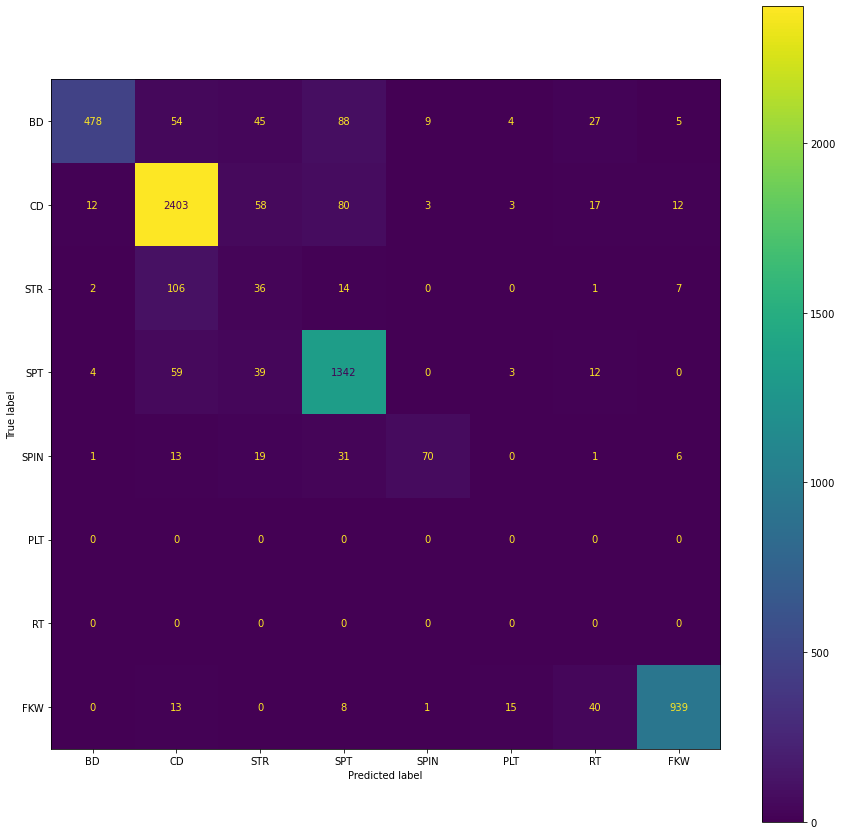

In [28]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


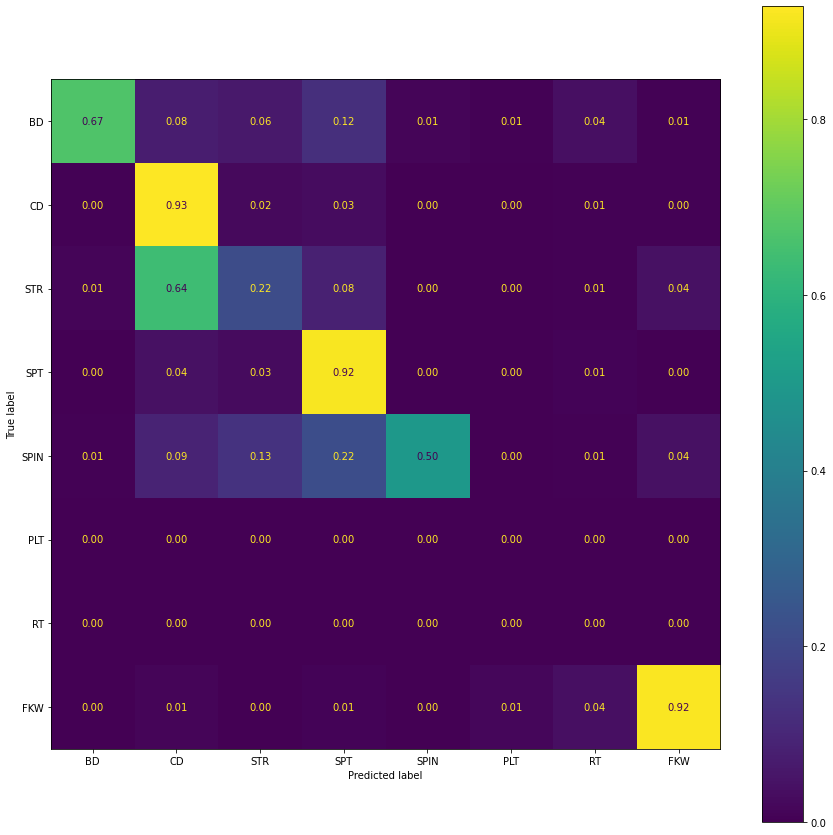

In [29]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## Star2006

In [30]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'


In [31]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [32]:
encounter_test

['false_killer s128',
 'pilot s142',
 'pilot s144',
 'pilot s145',
 'pilot s154',
 'pilot s156',
 'pilot s223',
 'pilot s230',
 'roughtoothed s112',
 'roughtoothed s153',
 'shortbeaked_common s216',
 'spinner s110',
 'spotted s237',
 'striped s111',
 'striped s115',
 'striped s138',
 'striped s205',
 'striped s248']

In [33]:
### run on a encounter encounter[0]

# avg_score_list = []
class_pred = []
class_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in encounter_test[0:1]:
# for ee in ['shortbeaked_common s628']:
    print('\n'+ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas = enounter_features(encounter_folder)
    
    whistleness = model_whistleness.predict(spec_feas)
    
    # calcualte scores for whistleness frames
    whistleness_ind = np.where(whistleness[:, 1]>0.9)[0]
    scores = model_species.predict(spec_feas[whistleness_ind,:, :, :])
    
    scores_large_ind = np.where(scores.max(axis=1) >= 0.5)[0]
    scores_large = scores[scores_large_ind, :]
    
    class_pred_curr = np.argmax(scores_large, axis=1)
    print(class_pred_curr)
    class_pred.append(class_pred_curr)
    
    class_truth_curr_one = species_dict[species_to_code[ee.split(" ")[0]]]
    class_truth_curr = [class_truth_curr_one]*np.ones(class_pred_curr.shape[0]).astype(int)
    print(class_truth_curr)
    class_truth.append(class_truth_curr)
    
    if False:
        # ave score
        # label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.70))))  # .mean(axis=0)
        whistle_species = (np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*(scores>0.70)  # .mean(axis=0)
        label_pred = (scores**2.0)*whistle_species

        num_large_score =(label_pred>0.0).sum(axis=0)
        total_score = np.sqrt(label_pred.sum(axis=0))
        avg_score = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score[cc] = total_score[cc] / num_large_score[cc]
        avg_score_list.append(avg_score)
        print('average score:')
        print(avg_score)

        # whistle counts
        count_large = whistle_species*(scores>0.70).sum(axis=0)
        print('count_large:')
        print(count_large)

        # max score
        max_score =label_pred.max(axis=0)
        print('maximum score:')
        print(max_score)
    
# avg_score_all = np.stack(avg_score_list)


false_killer s128
STAR06-091006-1150.wav
Sound length: 300.0
STAR06-091006-1155.wav
Sound length: 97.287
STAR06-091006-1210.wav
Sound length: 300.0
STAR06-091006-1205.wav
Sound length: 300.0
STAR06-091006-1125.wav
Sound length: 300.0
STAR06-091006-1200.wav
Sound length: 300.0
STAR06-091006-1145.wav
Sound length: 300.0
STAR06-091006-1130.wav
Sound length: 300.0
STAR06-091006-1220.wav
Sound length: 300.0
STAR06-091006-1156.wav
Sound length: 202.75
STAR06-091006-1215.wav
Sound length: 300.0
STAR06-091006-1140.wav
Sound length: 300.0
STAR06-091006-1135.wav
Sound length: 300.0
[7 7 7 ... 2 7 7]
[7 7 7 ... 7 7 7]

pilot s142
STAR06-091606-0835.wav
Sound length: 300.0
STAR06-091606-0825.wav
Sound length: 300.0
STAR06-091606-0830.wav
Sound length: 300.0
STAR06-091606-0840.wav
Sound length: 300.0
STAR06-091606-0820.wav
Sound length: 300.0
[3 3 5 5 3 3 3 5 2 3 3 3 3 3 3 3 3 3 5 3 3 3 3 5 5 5 3 2 2 2]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

pilot s144
STAR06-091606-1330.wa

In [34]:
class_pred_tot = np.concatenate(class_pred)
class_truth_tot = np.concatenate(class_truth)

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(class_truth_tot, class_pred_tot, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[   0    0    0    0    0    0    0    0]
 [   0   81   38    2    0    8    0    0]
 [   1   19 2878   11    0    4    0    3]
 [   0    0   46  536    0    2    0    0]
 [   0    1   16    2    1    0    0    0]
 [   4   63  145  150    2 2111   19   85]
 [   8    1   20   23    0   34   73   15]
 [   0    5   71    0    0   30   17 3346]]

[[0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.63 0.29 0.02 0.   0.06 0.   0.  ]
 [0.   0.01 0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.08 0.92 0.   0.   0.   0.  ]
 [0.   0.05 0.8  0.1  0.05 0.   0.   0.  ]
 [0.   0.02 0.06 0.06 0.   0.82 0.01 0.03]
 [0.05 0.01 0.11 0.13 0.   0.2  0.42 0.09]
 [0.   0.   0.02 0.   0.   0.01 0.   0.96]]


In [36]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

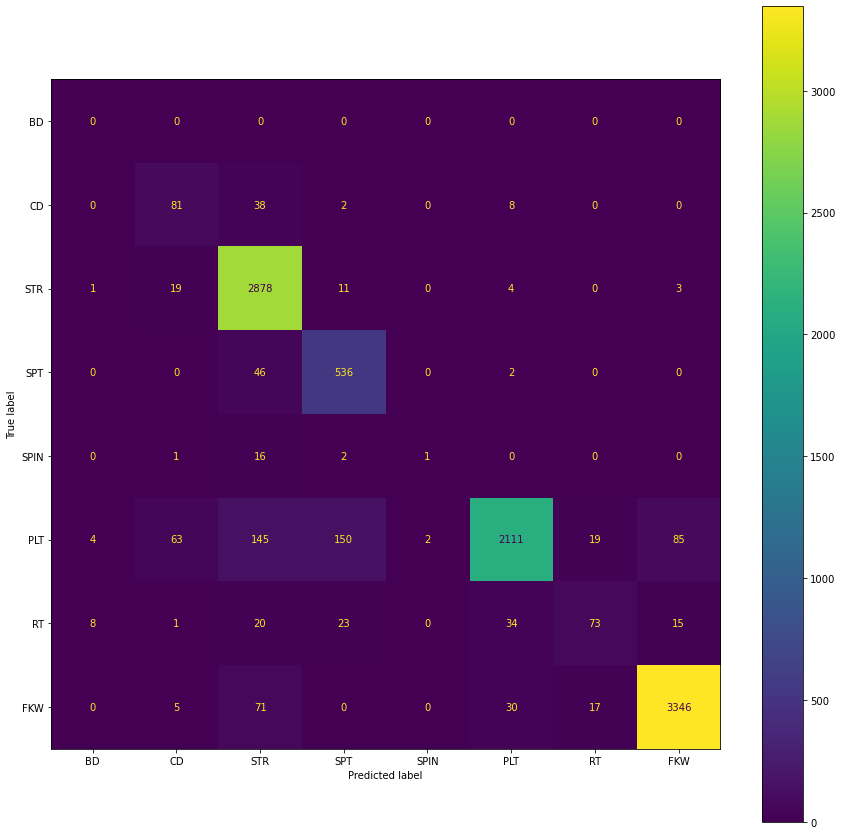

In [37]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


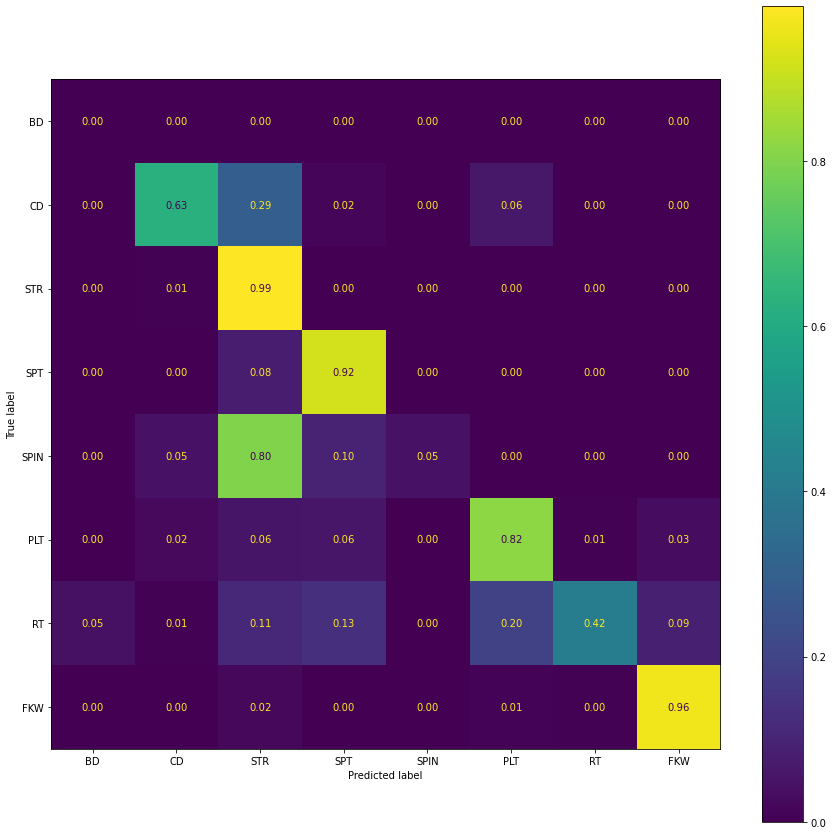

In [38]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## HIEAS2002

In [39]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'


In [40]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [41]:
encounter_test

['bottlenose s165',
 'pilot s219',
 'pilot s228',
 'pilot s261',
 'pilot s317',
 'pilot s318',
 'roughtoothed s125',
 'roughtoothed s167',
 'roughtoothed s194',
 'roughtoothed s234',
 'roughtoothed s245',
 'spinner s132',
 'spotted s129',
 'spotted s138',
 'spotted s195',
 'spotted s280',
 'spotted s296',
 'striped s124',
 'striped s160',
 'striped s189',
 'striped s205',
 'striped s244']

In [42]:
### run on a encounter encounter[0]

# avg_score_list = []
class_pred = []
class_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in encounter_test[0:1]:
# for ee in ['shortbeaked_common s628']:
    print('\n'+ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas = enounter_features(encounter_folder)
    
    whistleness = model_whistleness.predict(spec_feas)
    
    # calcualte scores for whistleness frames
    whistleness_ind = np.where(whistleness[:, 1]>0.9)[0]
    scores = model_species.predict(spec_feas[whistleness_ind,:, :, :])
    
    scores_large_ind = np.where(scores.max(axis=1) >= 0.5)[0]
    scores_large = scores[scores_large_ind, :]
    
    class_pred_curr = np.argmax(scores_large, axis=1)
    print(class_pred_curr)
    class_pred.append(class_pred_curr)
    
    class_truth_curr_one = species_dict[species_to_code[ee.split(" ")[0]]]
    class_truth_curr = [class_truth_curr_one]*np.ones(class_pred_curr.shape[0]).astype(int)
    print(class_truth_curr)
    class_truth.append(class_truth_curr)
    
    if False:
        # ave score
        # label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.70))))  # .mean(axis=0)
        whistle_species = (np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*(scores>0.70)  # .mean(axis=0)
        label_pred = (scores**2.0)*whistle_species

        num_large_score =(label_pred>0.0).sum(axis=0)
        total_score = np.sqrt(label_pred.sum(axis=0))
        avg_score = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score[cc] = total_score[cc] / num_large_score[cc]
        avg_score_list.append(avg_score)
        print('average score:')
        print(avg_score)

        # whistle counts
        count_large = whistle_species*(scores>0.70).sum(axis=0)
        print('count_large:')
        print(count_large)

        # max score
        max_score =label_pred.max(axis=0)
        print('maximum score:')
        print(max_score)
    
# avg_score_all = np.stack(avg_score_list)


bottlenose s165
HICEAS020908-090207.wav
Sound length: 60.0
HICEAS020908-084843.wav
Sound length: 60.0
HICEAS020908-085043.wav
Sound length: 60.0
HICEAS020908-085143.wav
Sound length: 5.44
HICEAS020908-090307.wav
Sound length: 37.7
HICEAS020908-090007.wav
Sound length: 60.0
HICEAS020908-084943.wav
Sound length: 60.0
HICEAS020908-090107.wav
Sound length: 60.0
[6 6 6 7 7 0 0 0 0 0 0 0 0 0 0 4 3 0 3 0 3 3 0 2 2 3 0 0 0 0 0 0 3 3 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 6 7 6 4 4 6 6 6 7 6 6 6 6 6 3 3 3 3 3 3 6 7 2 2 0 0 0 0 0 0 3 0 0 0 0 0 0 0 6 6 6 5 6 7 6
 6 4 4 6 4 4 6 6]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0]

pilot s219
HICEAS021017-112220.wav
Sound length: 60.0
HICEAS021017-112320.wav
Sound length: 60.0
HICEAS021017-112420.wav
Sound length: 3.28
HICEAS021017-112120.wav
Sound length: 60.0
[5 5 5 7 7 5 5 5 5 5 

In [43]:
class_pred_tot = np.concatenate(class_pred)
class_truth_tot = np.concatenate(class_truth)

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(class_truth_tot, class_pred_tot, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[  50    0    4   16    7    1   23    6]
 [   0    0    0    0    0    0    0    0]
 [   2   41  528  133    2    8    3    5]
 [  14   11  104 1233    5    6    0    8]
 [   6    0   11    5  185    4   79    5]
 [  10   15  277   48    5 3200   55   50]
 [   2    2   23   11   38   35 2435   58]
 [   0    0    0    0    0    0    0    0]]

[[0.47 0.   0.04 0.15 0.07 0.01 0.21 0.06]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.06 0.73 0.18 0.   0.01 0.   0.01]
 [0.01 0.01 0.08 0.89 0.   0.   0.   0.01]
 [0.02 0.   0.04 0.02 0.63 0.01 0.27 0.02]
 [0.   0.   0.08 0.01 0.   0.87 0.02 0.01]
 [0.   0.   0.01 0.   0.01 0.01 0.94 0.02]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]]


In [45]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

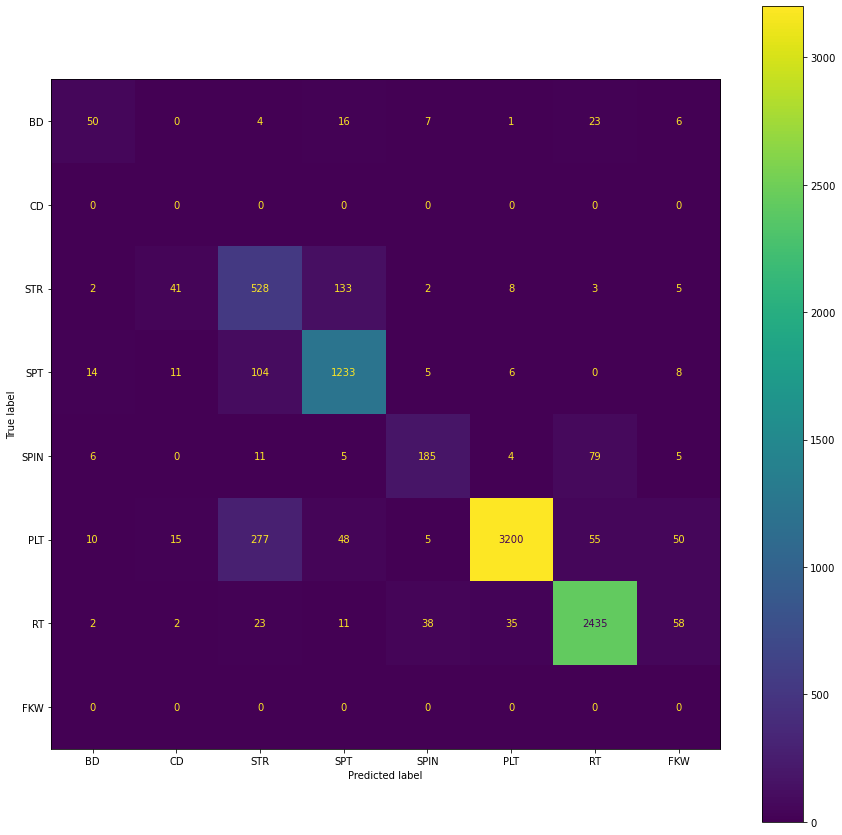

In [46]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


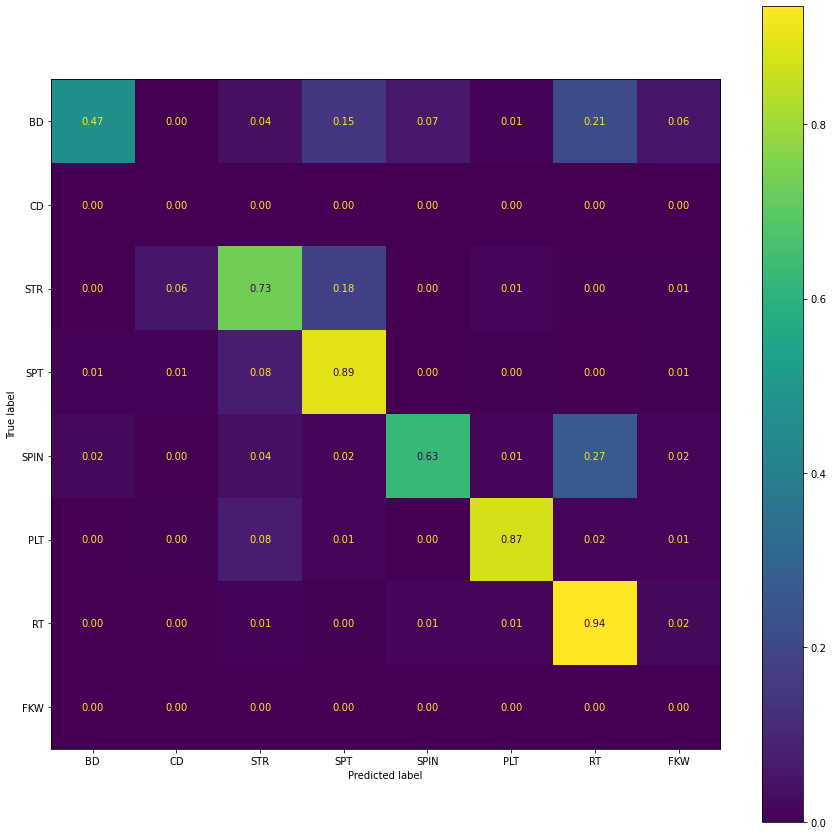

In [47]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)

## PICEAS2005

In [48]:
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2006_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/HICEAS2002_48kHz'
deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/PICEAS2005_48kHz'
# deploy_path_test = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2000_48kHz'


In [49]:
encounter_test =  os.listdir(deploy_path_test)
encounter_test.sort()

In [50]:
encounter_test

['bottlenose a101',
 'bottlenose a73',
 'false_killer a215',
 'false_killer a245',
 'false_killer a249',
 'false_killer a250',
 'false_killer a253',
 'false_killer a57',
 'false_killer a67',
 'pilot a86',
 'pilot a93',
 'roughtoothed a178',
 'roughtoothed a179',
 'roughtoothed a23',
 'roughtoothed a75',
 'spinner a104',
 'spinner a132',
 'spinner a90',
 'spinner a98',
 'spotted a116',
 'spotted a117',
 'spotted a122',
 'spotted a25',
 'spotted a2600',
 'spotted a35',
 'striped a107',
 'striped a108',
 'striped a151',
 'striped a50',
 'striped a94',
 'striped a96']

In [51]:
### run on a encounter encounter[0]

# avg_score_list = []
class_pred = []
class_truth = []
for ee in encounter_test:
# for ee in encounter_test[0:3]:
# for ee in encounter_test[0:1]:
# for ee in ['shortbeaked_common s628']:
    print('\n'+ee)

    encounter_folder = os.path.join(deploy_path_test, ee)
    spec_feas = enounter_features(encounter_folder)
    
    whistleness = model_whistleness.predict(spec_feas)
    
    # calcualte scores for whistleness frames
    whistleness_ind = np.where(whistleness[:, 1]>0.9)[0]
    scores = model_species.predict(spec_feas[whistleness_ind,:, :, :])
    
    scores_large_ind = np.where(scores.max(axis=1) >= 0.5)[0]
    scores_large = scores[scores_large_ind, :]
    
    class_pred_curr = np.argmax(scores_large, axis=1)
    print(class_pred_curr)
    class_pred.append(class_pred_curr)
    
    class_truth_curr_one = species_dict[species_to_code[ee.split(" ")[0]]]
    class_truth_curr = [class_truth_curr_one]*np.ones(class_pred_curr.shape[0]).astype(int)
    print(class_truth_curr)
    class_truth.append(class_truth_curr)
    
    if False:
        # ave score
        # label_pred = np.sqrt(((scores**2.0)*(np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*((scores>0.70))))  # .mean(axis=0)
        whistle_species = (np.multiply(whistleness_bin.reshape(-1, 1), np.ones((1,8))))*(scores>0.70)  # .mean(axis=0)
        label_pred = (scores**2.0)*whistle_species

        num_large_score =(label_pred>0.0).sum(axis=0)
        total_score = np.sqrt(label_pred.sum(axis=0))
        avg_score = np.zeros(8)
        for cc in range(8):
            if num_large_score[cc] > 0:
                avg_score[cc] = total_score[cc] / num_large_score[cc]
        avg_score_list.append(avg_score)
        print('average score:')
        print(avg_score)

        # whistle counts
        count_large = whistle_species*(scores>0.70).sum(axis=0)
        print('count_large:')
        print(count_large)

        # max score
        max_score =label_pred.max(axis=0)
        print('maximum score:')
        print(max_score)
    
# avg_score_all = np.stack(avg_score_list)


bottlenose a101
piceas-050824-083000.wav
Sound length: 120.0
piceas-050824-080400.wav
Sound length: 120.0
piceas-050824-083400.wav
Sound length: 120.0
piceas-050824-082000.wav
Sound length: 120.0
piceas-050824-082200.wav
Sound length: 120.0
piceas-050824-082600.wav
Sound length: 4.85
piceas-050824-083600.wav
Sound length: 120.0
piceas-050824-083200.wav
Sound length: 120.0
piceas-050824-081000.wav
Sound length: 120.0
piceas-050824-080600.wav
Sound length: 120.0
piceas-050824-081600.wav
Sound length: 120.0
piceas-050824-081400.wav
Sound length: 120.0
piceas-050824-081200.wav
Sound length: 120.0
piceas-050824-082800.wav
Sound length: 120.0
piceas-050824-080800.wav
Sound length: 120.0
piceas-050824-082400.wav
Sound length: 120.0
piceas-050824-083800.wav
Sound length: 120.0
piceas-050824-082648.wav
Sound length: 71.329
piceas-050824-084000.wav
Sound length: 120.0
piceas-050824-081800.wav
Sound length: 120.0
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]

bottlenose a73
piceas-050820-104000-chan1.wav


In [52]:
class_pred_tot = np.concatenate(class_pred)
class_truth_tot = np.concatenate(class_truth)

In [53]:
from sklearn.metrics import confusion_matrix, classification_report
print("Confusion matrix:")
cm = confusion_matrix(class_truth_tot, class_pred_tot, labels=species_id)

print(species_list)
print('')
print(cm)
print('')

cm2 = cm*1.0
for ii in range(cm.shape[0]):
    cm_row = cm[ii, :]*1.0

    cm_row_sum = cm_row.sum()
    if cm_row_sum != 0:
        cm2[ii, :] = cm_row / cm_row_sum
    else:
        cm2[ii, :] = np.zeros(cm.shape[1])

print(cm2)

Confusion matrix:
['BD', 'CD', 'STR', 'SPT', 'SPIN', 'PLT', 'RT', 'FKW']

[[4798    7  259  306  165   37    4   16]
 [   0    0    0    0    0    0    0    0]
 [  40    2 1226   87   25    1    3    8]
 [  55    0  118 1419   87    8    7   15]
 [ 155    0  140   67 1078    2    7    8]
 [  17    0   21    0    8  910    7   67]
 [  42    1   22    3   37   29 1251  182]
 [  12   11  106    8   12   62  140 7006]]

[[0.86 0.   0.05 0.05 0.03 0.01 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.03 0.   0.88 0.06 0.02 0.   0.   0.01]
 [0.03 0.   0.07 0.83 0.05 0.   0.   0.01]
 [0.11 0.   0.1  0.05 0.74 0.   0.   0.01]
 [0.02 0.   0.02 0.   0.01 0.88 0.01 0.07]
 [0.03 0.   0.01 0.   0.02 0.02 0.8  0.12]
 [0.   0.   0.01 0.   0.   0.01 0.02 0.95]]


In [54]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=species_list)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=species_list)

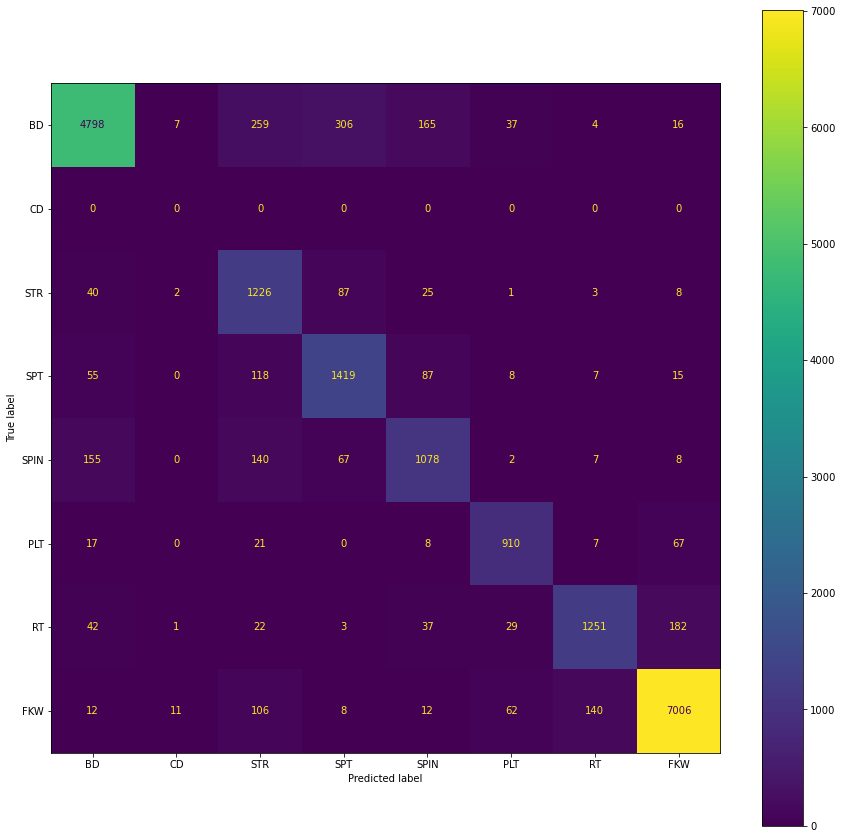

In [55]:
fig, ax = plt.subplots(figsize=[15, 15])
disp.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format=None, colorbar=True)


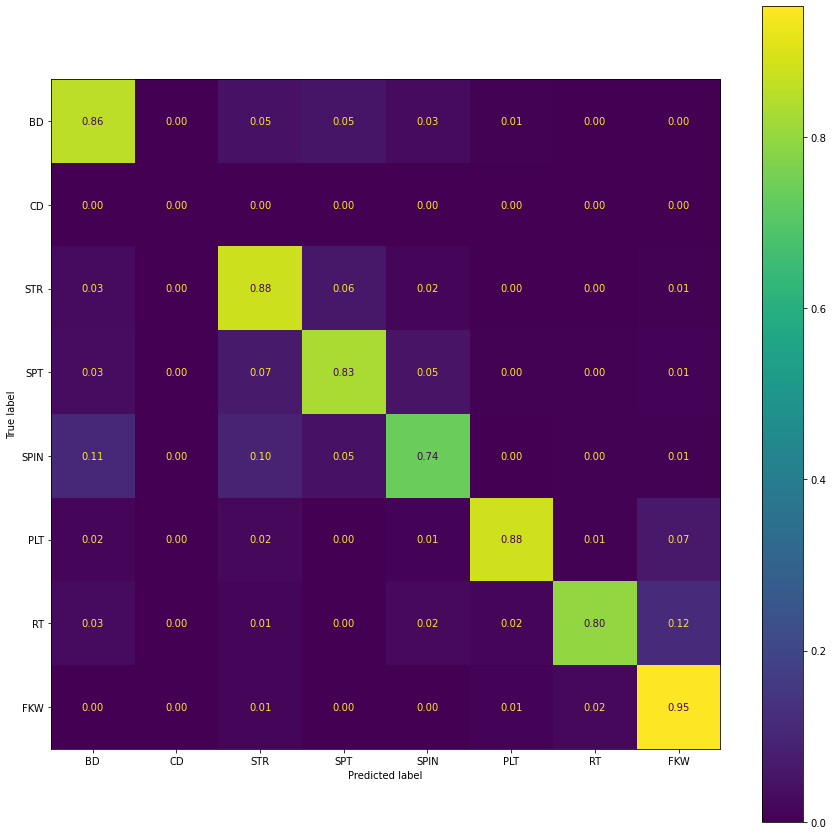

In [56]:
fig, ax = plt.subplots(figsize=[15, 15])
disp2.plot(include_values=True,
                     cmap='viridis', ax=ax, xticks_rotation='horizontal',
                     values_format='.2f', colorbar=True)